In [2]:
import cv2
from dt_apriltags import Detector
import matplotlib.pyplot as plt
import numpy as np
import april_tag_following as atf
from pid import PID

In [3]:
vcap = cv2.VideoCapture("AprilTagTest.mkv")

x_pid = PID(0.158, 0.0, 0.025)
y_pid = PID(0.108, 0.0, 0.025)

frequency = 100
count = 0


tag translateion: [[ 0.06891843]
 [-0.10942922]
 [ 0.53369045]]
tag rotateions: [[-0.04171466 -0.99805747  0.04627275]
 [ 0.99596819 -0.03785674  0.0813279 ]
 [-0.07941818  0.04947875  0.99561268]]
x error: 136.99029752162141
y error: -217.7090564129116
Center: (960.0, 540.0)
X-error(PID): 21.646667189422242
Y-error(PID): -23.511745820266373
(21, -23)


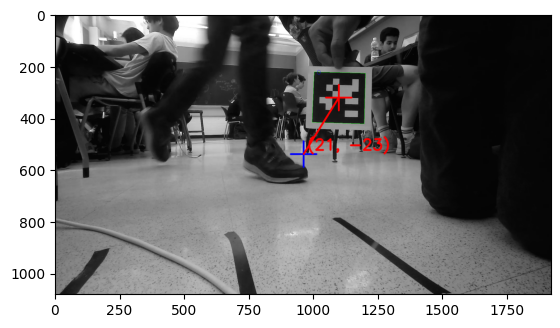

tag translateion: [[ 0.07007202]
 [-0.10919116]
 [ 0.53303226]]
tag rotateions: [[-0.03950993 -0.99822959  0.04445962]
 [ 0.99634952 -0.03598773  0.07741137]
 [-0.07567432  0.04735584  0.99600744]]
x error: 139.4916286201792
y error: -217.5108263380721
Center: (960.0, 540.0)
X-error(PID): 22.08584457121785
Y-error(PID): -23.487510500884948
(22, -23)


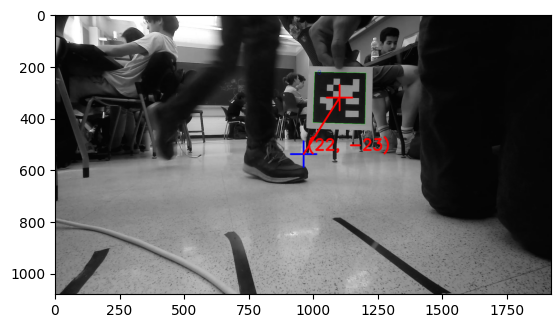

tag translateion: [[ 0.07115832]
 [-0.10907029]
 [ 0.53180929]]
tag rotateions: [[-0.03879322 -0.99806625  0.04856799]
 [ 0.99676497 -0.03522729  0.07224012]
 [-0.07038951  0.0512133   0.99620405]]
x error: 141.95526787025528
y error: -217.75925693072895
Center: (960.0, 540.0)
X-error(PID): 22.474952636437738
Y-error(PID): -23.522640388904875
(22, -23)


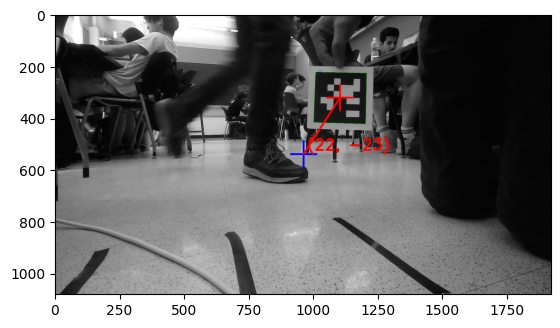

tag translateion: [[ 0.07241679]
 [-0.10898403]
 [ 0.5306201 ]]
tag rotateions: [[-0.0379768  -0.9983121   0.04393985]
 [ 0.99753945 -0.0352809   0.06058311]
 [-0.05893061  0.04613249  0.99719556]]
x error: 144.77682032014468
y error: -218.0971415683399
Center: (960.0, 540.0)
X-error(PID): 22.927674833937893
Y-error(PID): -23.560830589622807
(22, -23)


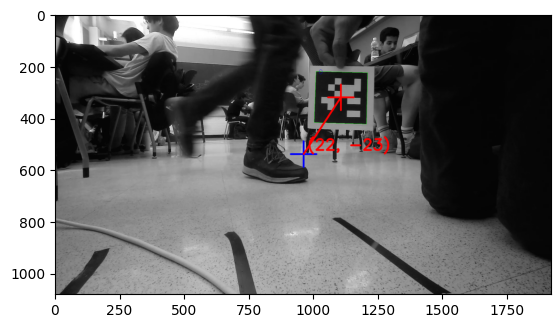

tag translateion: [[ 0.07419856]
 [-0.10861482]
 [ 0.52930992]]
tag rotateions: [[-0.0361651  -0.99861984  0.03808546]
 [ 0.9982655  -0.03432818  0.04782844]
 [-0.04645502  0.03974912  0.99812922]]
x error: 148.55121744687563
y error: -217.8609352663151
Center: (960.0, 540.0)
X-error(PID): 23.542460276270177
Y-error(PID): -23.52451471386512
(23, -23)


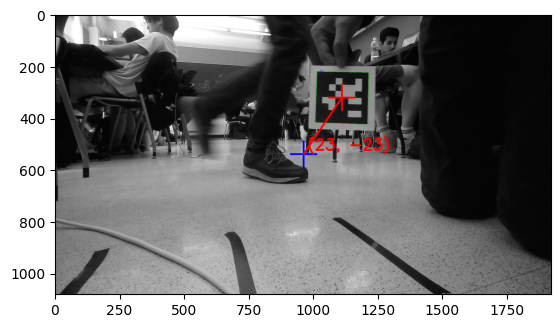

tag translateion: [[ 0.07666193]
 [-0.10761261]
 [ 0.52789617]]
tag rotateions: [[-0.0324494  -0.99904083  0.02940175]
 [ 0.99858854 -0.03116908  0.04300487]
 [-0.04204719  0.03075573  0.99864214]]
x error: 153.84611262742533
y error: -216.50559040830672
Center: (960.0, 540.0)
X-error(PID): 24.407552689797114
Y-error(PID): -23.357040654693286
(24, -23)


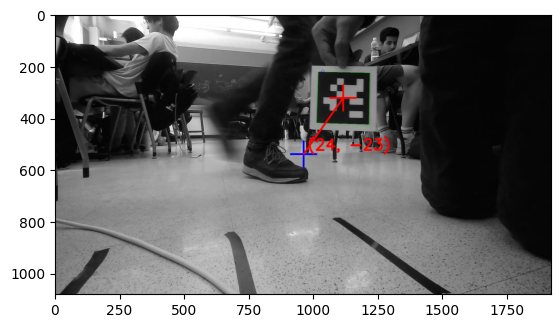

tag translateion: [[ 0.08002334]
 [-0.10582221]
 [ 0.52654762]]
tag rotateions: [[-0.02853882 -0.99934579  0.02221529]
 [ 0.99822012 -0.02732833  0.05300714]
 [-0.05236535  0.02368851  0.998347  ]]
x error: 160.96653120696988
y error: -213.58925937363125
Center: (960.0, 540.0)
X-error(PID): 25.562163536930075
Y-error(PID): -23.014620059078197
(25, -23)


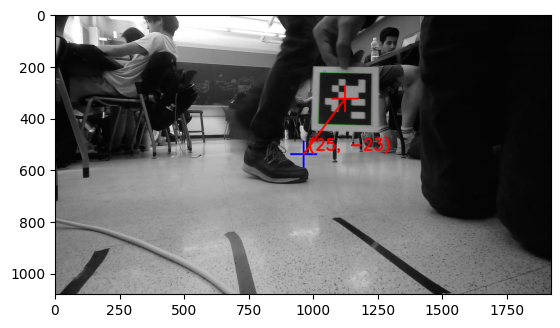

tag translateion: [[ 0.08426315]
 [-0.10296308]
 [ 0.5246678 ]]
tag rotateions: [[-0.02259231 -0.99966887  0.01231787]
 [ 0.99743073 -0.02170048  0.06827166]
 [-0.06798175  0.01382864  0.99759072]]
x error: 170.0274278089978
y error: -208.53633379023017
Center: (960.0, 540.0)
X-error(PID): 27.03469897354013
Y-error(PID): -22.426917654234554
(27, -22)


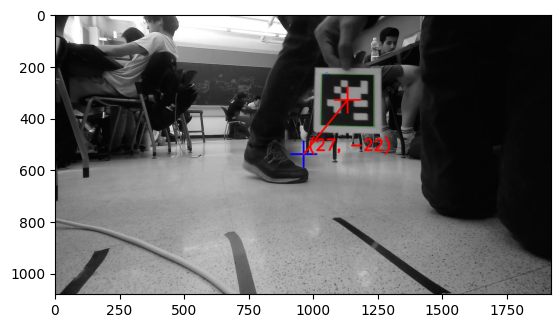

KeyboardInterrupt: 

In [5]:
while True:
    if count%frequency == 0:
        ret, frame = vcap.read()

        if not ret:
            break

        processed_image, tags, x_raw_error, y_raw_error = atf.detect_april_tags(frame)

        x_error = x_pid.update(x_raw_error)
        y_error = y_pid.update(y_raw_error)

        print(f"Center: {(frame.shape[1]/2, frame.shape[0]/2)}")

        print(f"X-error(PID): {x_error}")
        print(f"Y-error(PID): {y_error}")

        errStr = f"({int(x_error)}, {int(y_error)})"
        print(errStr)
        cv2.putText(processed_image, errStr, org=(int(frame.shape[1]/2 + x_error/3*2), int(frame.shape[0]/2 + y_error/3*2)), fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                    fontScale=2,
                    color=(255, 0, 0),
                    thickness=5, 
                    lineType=cv2.LINE_AA)

        plt.imshow(processed_image)
        plt.show()
        
    count +=1